# Initiation to Text Mining

<br/>

## Julien Velcin

<!--<div style="margin-left: 10px;">Laboratoire ERIC</div>
<div style="margin-left: 10px;">Université Lyon 2</div>-->

Laboratoire ERIC<br/>
Université Lyon 2

[@jvelcin](https://twitter.com/jvelcin)

[http://mediamining.univ-lyon2.fr/velcin/](http://mediamining.univ-lyon2.fr/velcin/)

All the code has been tested on **R version 3.2.2**.

For the notebook and slideshow generation, I've used ipython 4.0.1 and RISE plugin:

Reveal.js - Jupyter/IPython Slideshow Extension<br/>
http://bollwyvl.github.io/live_reveal/

The notebook will be provided on request *at the end* of the course (this is done on purpose).

## Lecture ouline

* Different ways to represent the textual data
* Preprocessing
* Building a basic search engine
* Beyond words

## Different ways to represent text data

- Bag-of-Words (BoW)
- Vector Space Model (VSM)
- Adding metadata (e.g., part of speech)
- Advanced representations: syntax/parse trees, graphs, etc.

Each representation implies different ways to *compare* textual documents.

## A very simple example:

*"John Doe has bought an apple."*

Linguistic point of view:

<table style="border:0;">
<tr style="border:0;">
<td style="border:0; white-space:pre; padding:0 100px 0 0px;">"John Doe has bought an apple."</td>
<td style="border:0;"><img src="img/syntaxtree.png" style='height: 150px'/></td>
</tr>
</table>

Statistical point of view:

<img src="img/bow-illu.png" style='height: 150px'/>

<table style="border:0;">
<tr style="border:0;">
<td style="border:0; white-space:pre; padding:0 100px 0 0px;">"John Doe has bought an apple."</td>
<td style="border:0;">{ apple,<br/><br/> bought,<br/><br/>John_Doe } </td>
</tr>
</table>

## Different ways to represent text data

- **Bag-of-Words (BoW)**
- Vector Space Model (VSM)
- Adding metadata (e.g., part of speech)
- Advanced representations: syntax/parse trees, graphs, etc.

<img src="img/bow.png" style='height: 400px'/>

There is an obvious problem with:

*"Mary asked Fred out."*
<br/>
*"Fred asked Mary out."*

Same representation:
<img src="img/mary.png" style='height: 200px'/>

And here is the terms x documents matrix:

<img src="img/termdocmatrix.png" style='height: 300px'/>

For instance:
<img src="img/termdocmatrix-2.jpg" style='width: 400px'/>

## Different ways to represent text data

- Bag-of-Words (BoW)
- **Vector Space Model (VSM)**
- Adding metadata (e.g., part of speech)
- Advanced representations: syntax/parse trees, graphs, etc.

Embed the textual data into a vector space in order to allow algebric manipulations (Salton, 1975)
<br/>
<img src="img/vsm.png" style='height: 400px'/>

Useful representation for: information retrieval, classification, clustering...

Some useful R functions:

`paste(ch1, ch2...)`: concatenate strings<br/>
`gsub(pattern, replace, ch)`: replace all occurrences of *pattern* by *replace* in *ch*<br/>
`strsplit(ch, pattern)`: split string *ch* into substrings according to *pattern*

And my own hand-crafted functions:

`build_vocab(ch)`: build the vocabulary based on string *ch*<br/>
`embed(ch, vocab):` embed string *ch* into the vocabulary *vocab*

In [210]:
options(repr.plot.width=12, repr.plot.height=6)
simple_clean <- function(ch)
{
  return(unlist(strsplit(tolower(ch), "[^[:alpha:]]")))
}
build_vocab <- function(ch)
{
  tokens <- simple_clean(ch)
  return (sort(unique(tokens[nchar(tokens) > 2])))
}
embed <- function(ch, vocab)
{
  tokens <- simple_clean(ch)
  vec <- rep(0, length(vocab))
  for (t in tokens)
  {
    index <- match(t, vocab)
    vec[index] <- vec[index] + 1
  }
  return(vec)
}

In [280]:
ch1 <- "In geography a bank generally refers to the land alongside
        a body of water banks."
ch2 <- "Various structures are referred to as banks in different fields
        of geography."
ch3 <- "In limnology, the study of inland waters, a stream bank or river bank
        is the terrain alongside the bed of a river, creek, or stream."
message("Automatically built vocabulary:")
vocab <- print(build_vocab(paste(ch1, ch2, ch3)))
message("VSM representations of the three sentences:")
v1 <- print(embed(ch1, vocab))
v2 <- print(embed(ch2, vocab))
v3 <- print(embed(ch3, vocab))

Automatically built vocabulary:


 [1] "alongside"  "are"        "bank"       "banks"      "bed"       
 [6] "body"       "creek"      "different"  "fields"     "generally" 
[11] "geography"  "inland"     "land"       "limnology"  "referred"  
[16] "refers"     "river"      "stream"     "structures" "study"     
[21] "terrain"    "the"        "various"    "water"      "waters"    


VSM representations of the three sentences:


 [1] 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 [1] 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 [1] 1 0 2 0 1 0 1 0 0 0 0 1 0 1 0 0 2 2 0 1 1 3 0 0 1


This way, it is "easy" to make pairwise comparisons:

In [212]:
message(ch1)
message(ch2)
message(ch3) 
sprintf("v1.v2 = %i", v1%*%v2)
sprintf("v1.v3 = %i", v1%*%v3)
sprintf("v2.v3 = %i", v2%*%v3)

In geography a bank generally refers to the land alongside
        a body of water banks
Various structures are referred to as banks in different fields
        of geography.
In limnology, the study of inland waters, a stream bank or river bank
        is the terrain alongside the bed of a river, creek, or stream.


[1] "v1.v2 = 2"

[1] "v1.v3 = 6"

[1] "v2.v3 = 0"

## Preprocessing

* **tokenization**
* basic cleaning
* stopwords
* stemming

## Tokenization / Word segmentation

Split a string into basic (lexical) **units**, such as words.

Different rules for different languages:

我已经等我的包裹三星期了！
<br/>
(I've been waiting three weeks for my parcel to arrive!)

En français,c'est assez simple mais<br/>ilfaut faire attention<br/>notamment sur plusieurs lignes.

Even in English or French, you can have difficulties splitting strings.

In [213]:
message("For instance:\n")
string <- "Here is, for sure, a small paragraph I'd like to parse\non multiple lines.Is this that simple?I guess not."
message(string)
gsub("[^[:alpha:]||[:blank:]]", "", string)

For instance:

Here is, for sure, a small paragraph I'd like to parse
on multiple lines.Is this that simple?I guess not.


[1] "Here is for sure a small paragraph Id like to parseon multiple linesIs this that simpleI guess not"

Usually, in most western languages, we use a known list of separation marks:

, . \n \t - : ; ( ) ! ? [ ] _ ' "  (etc.)

But...:

>"Harry Potter" => "Harry", "Potter"<br/>
>"rez-de-chaussée" => "chaussée", "de", "rez"<br/>
>"idiot?" => "idiot"<br/>
>"C.E.O" => "C", "E", "O"

Let's test a simple tokenization in R:

*"The challenge of exploiting the large proportion of enterprise information that originates in "unstructured" form has been recognized for decades.[7] It is recognized in the earliest definition of business intelligence (BI), in an October 1958 IBM Journal article by H.P. Luhn, A Business Intelligence System, which describes a system that will:"* <br/>(excerpt of https://en.wikipedia.org/wiki/Text_mining)

In [214]:
ch <- "The challenge of exploiting the large proportion of enterprise information that originates in \"unstructured\" form has been recognized for decades.[7] It is recognized in the earliest definition of business intelligence (BI), in an October 1958 IBM Journal article by H.P. Luhn, A Business Intelligence System, which describes a system that will:"
message("Spaces only as delimiters:")
strsplit(ch, "[[:blank:]]")

Spaces only as delimiters:


[[1]]
 [1] "The"              "challenge"        "of"               "exploiting"      
 [5] "the"              "large"            "proportion"       "of"              
 [9] "enterprise"       "information"      "that"             "originates"      
[13] "in"               "\"unstructured\"" "form"             "has"             
[17] "been"             "recognized"       "for"              "decades.[7]"     
[21] "It"               "is"               "recognized"       "in"              
[25] "the"              "earliest"         "definition"       "of"              
[29] "business"         "intelligence"     "(BI),"            "in"              
[33] "an"               "October"          "1958"             "IBM"             
[37] "Journal"          "article"          "by"               "H.P."            
[41] "Luhn,"            "A"                "Business"         "Intelligence"    
[45] "System,"          "which"            "describes"        "a"               
[49] "system"           "that"             "will:"

In [215]:
message("All are delimiters but the alphabetic characters:")
strsplit(ch, "[^[:alpha:]]")

All are delimiters but the alphabetic characters:


[[1]]
 [1] "The"          "challenge"    "of"           "exploiting"   "the"         
 [6] "large"        "proportion"   "of"           "enterprise"   "information" 
[11] "that"         "originates"   "in"           ""             "unstructured"
[16] ""             "form"         "has"          "been"         "recognized"  
[21] "for"          "decades"      ""             ""             ""            
[26] ""             "It"           "is"           "recognized"   "in"          
[31] "the"          "earliest"     "definition"   "of"           "business"    
[36] "intelligence" ""             "BI"           ""             ""            
[41] "in"           "an"           "October"      ""             ""            
[46] ""             ""             ""             "IBM"          "Journal"     
[51] "article"      "by"           "H"            "P"            ""            
[56] "Luhn"         ""             "A"            "Business"     "Intelligence"
[61] "System"       ""             "which"        "describes"    "a"           
[66] "system"       "that"         "will"

Removing empty elements:

In [216]:
ch.tokenized <- unlist(strsplit(ch, "[^[:alpha:]]"))
ch.tokenized[ch.tokenized != ""]

[1] "The"          "challenge"    "of"           "exploiting"   "the"         
 [6] "large"        "proportion"   "of"           "enterprise"   "information" 
[11] "that"         "originates"   "in"           "unstructured" "form"        
[16] "has"          "been"         "recognized"   "for"          "decades"     
[21] "It"           "is"           "recognized"   "in"           "the"         
[26] "earliest"     "definition"   "of"           "business"     "intelligence"
[31] "BI"           "in"           "an"           "October"      "IBM"         
[36] "Journal"      "article"      "by"           "H"            "P"           
[41] "Luhn"         "A"            "Business"     "Intelligence" "System"      
[46] "which"        "describes"    "a"            "system"       "that"        
[51] "will"

Keeping only words with a sufficient length:

In [217]:
ch.tokenized[nchar(ch.tokenized) > 2]

[1] "The"          "challenge"    "exploiting"   "the"          "large"       
 [6] "proportion"   "enterprise"   "information"  "that"         "originates"  
[11] "unstructured" "form"         "has"          "been"         "recognized"  
[16] "for"          "decades"      "recognized"   "the"          "earliest"    
[21] "definition"   "business"     "intelligence" "October"      "IBM"         
[26] "Journal"      "article"      "Luhn"         "Business"     "Intelligence"
[31] "System"       "which"        "describes"    "system"       "that"        
[36] "will"

etc. (see "basic cleaning")

## Preprocessing

* tokenization
* **basic cleaning**
* stopwords
* stemming

Really basic cleaning includes

* converting string to lowercase
* removing numbers
* removing punctuation marks

Let's practice!

For the rest of the talk, I will showcase on a famous best-seller:

<img src="img/phil_stone.jpg" style='height: 400px'/>

However, I cannot distribute the data for obvious copyright issues. Instead, feel free to use the numerous **open data**! 

<img src="img/gutenberg.png" style='height: 600px'/>

http://www.gutenberg.org

In [283]:
library(NLP)
library(tm)

hp <- readLines("data/HP1.txt", encoding="UTF-8")
#hp <- readLines("data/HP1.txt", encoding="UTF-8", n=2000)
#hp <- hp[21:2000]

#hp <- readLines("data/melville.txt", encoding="UTF-8")

message("Excerpt of the raw textfile:")
excerpt <- 30
hp[excerpt]

Excerpt of the raw textfile:


[1] "Mr. Dursley sat frozen in his armchair. Shooting stars all over Britain? Owls flying by daylight? Mysterious people in cloaks all over the place? And a whisper, a whisper about the Potters...."

Building the **corpus** object from a vector source:

In [286]:
hp.corpus <- Corpus(VectorSource(hp))

message("Corpus consituted with TM:")
hp.corpus

message("Accessing one document:")
excerpt <- 30

#inspect(hp.corpus[10:12])
hp.corpus[[excerpt]]$content

Corpus consituted with TM:


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3219

Accessing one document:


[1] "Mr. Dursley sat frozen in his armchair. Shooting stars all over Britain? Owls flying by daylight? Mysterious people in cloaks all over the place? And a whisper, a whisper about the Potters...."

After lowercasing:

In [291]:
hp.corpus <- tm_map(hp.corpus, content_transformer(tolower))
hp.corpus[[excerpt]]$content

[1] "mr. dursley sat frozen in his armchair. shooting stars all over britain? owls flying by daylight? mysterious people in cloaks all over the place? and a whisper, a whisper about the potters...."

Without numbers and punctuation:

In [292]:
hp.corpus <- tm_map(hp.corpus, removeNumbers)
hp.corpus <- tm_map(hp.corpus, removePunctuation)
hp.corpus[[excerpt]]$content

[1] "mr dursley sat frozen in his armchair shooting stars all over britain owls flying by daylight mysterious people in cloaks all over the place and a whisper a whisper about the potters"

In [278]:
toSpace <- content_transformer(function (x , pattern) gsub(pattern, " ", x))
hp.corpus.test <- tm_map(hp.corpus, toSpace, "”")
hp[100]
hp.corpus.test[[100]]$content

[1] "\"Is that where -?<U+201D> whispered Professor McGonagall."

[1] "is that where <U+201D> whispered professor mcgonagall"

## Preprocessing

* tokenization
* basic cleaning
* **stopwords**
* stemming

Let's build the Terms x Docs matrix!

In [310]:
hp.dtm <- TermDocumentMatrix(hp.corpus)
inspect(hp.dtm[200:210,1:20])
hp[7]

<<TermDocumentMatrix (terms: 11, documents: 20)>>
Non-/sparse entries: 2/218
Sparsity           : 99%
Maximal term length: 9
Weighting          : term frequency (tf)

                Docs
Terms            1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  anymore<U+201D>  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anyone         0 0 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0
  anyone<U+201D>   0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anyones        0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anythin        0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anythin<U+201D>  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anything       0 0 0 0 1 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anything<U+201D> 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anytime        0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anyway         0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  anyway<U+201D>   0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  

[1] "The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years; in fact, Mrs. Dursley pretended she didn't have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be. The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street. The Dursleys knew that the Potters had a small son, too, but they had never even seen him. This boy was another good reason for keeping the Potters away; they didn't want Dudley mixing with a child like that."

Mapping the (sparse) representation to a full (and much bigger) representation as a matrix.

In [223]:
m <- as.matrix(hp.dtm)

Pay attention: this operation can be really costly in term of **memory size**!

We can easily print the compact description of a document.

In [298]:
excerpt <- 30
hp[excerpt]
q <- m[,excerpt]
lignes.non.vides <- which(q > 0)
m[lignes.non.vides, excerpt]

[1] "Mr. Dursley sat frozen in his armchair. Shooting stars all over Britain? Owls flying by daylight? Mysterious people in cloaks all over the place? And a whisper, a whisper about the Potters...."

about        all        and   armchair    britain     cloaks   daylight 
         1          2          1          1          1          1          1 
   dursley     flying     frozen        his mysterious       over       owls 
         1          1          1          1          1          2          1 
    people      place    potters        sat   shooting      stars        the 
         1          1          1          1          1          1          2 
   whisper 
         2

After summing over all term frequencies and sorting:

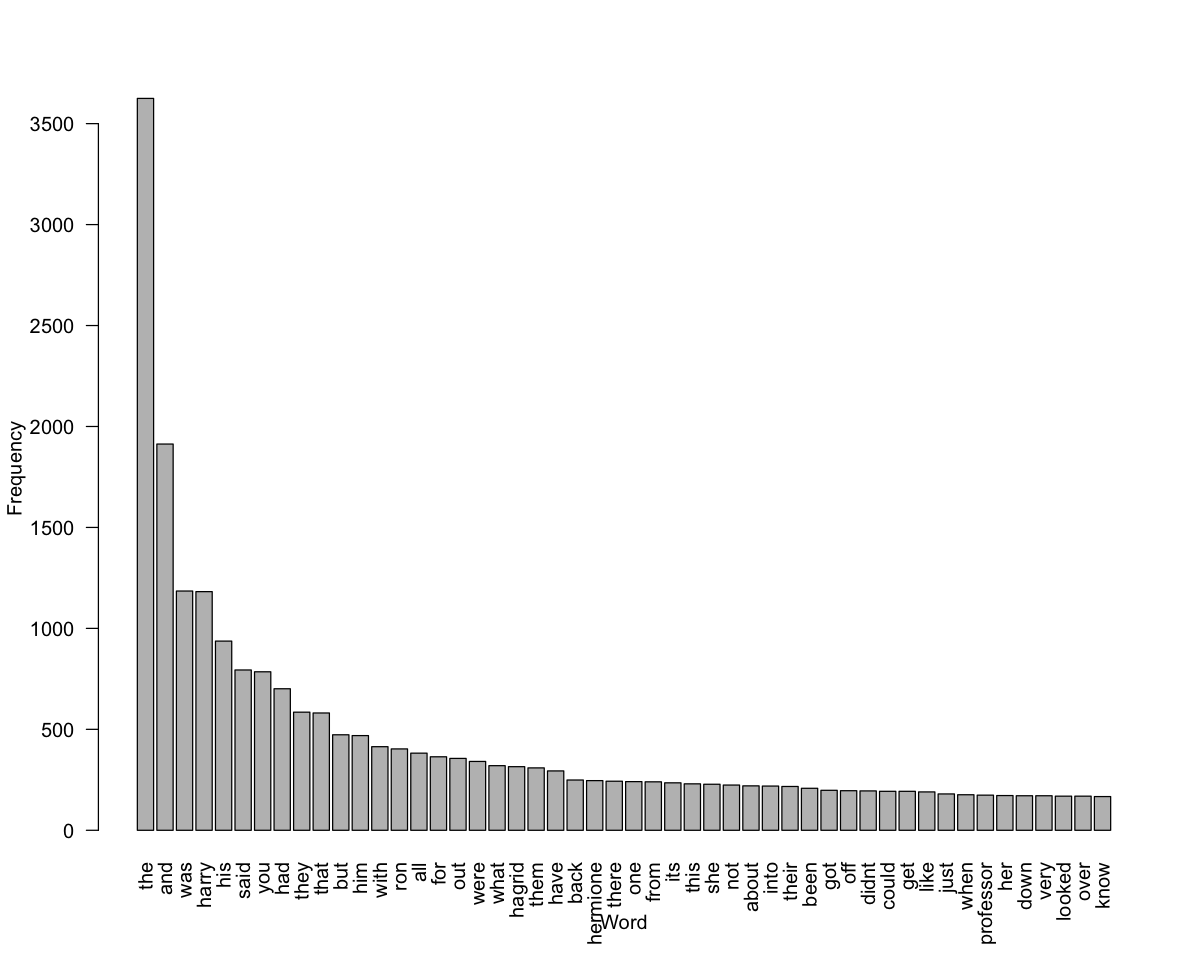

In [265]:
hp.freq <- rowSums(m)
hp.freq.sorted <- sort(hp.freq, decreasing=TRUE)
barplot(hp.freq.sorted[1:50], xlab="Word", ylab="Frequency", las=2)

This particular shape is called the **Zipf's law** for it has been first observed by the linguist George K. Zipf (1902-1950).

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is **inversely proportional** to its rank in the frequency table.

Note that most of the top words don't carry much information.

Stop-words are words that from non-linguistic view do not carry information.
They have mainly **functional** role.
Usually we remove them to help the methods to perform better.

In [302]:
stopwords("english")[1:50]

[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"      
[21] "herself"    "it"         "its"        "itself"     "they"      
[26] "them"       "their"      "theirs"     "themselves" "what"      
[31] "which"      "who"        "whom"       "this"       "that"      
[36] "these"      "those"      "am"         "is"         "are"       
[41] "was"        "were"       "be"         "been"       "being"     
[46] "have"       "has"        "had"        "having"     "do"

Stop words are language dependent - examples:

In [226]:
message("French:")
stopwords("french")[1:15]
message("Dutch:")
stopwords("dutch")[1:15]
message("Hungarian:")
stopwords("hungarian")[1:15]

French:


[1] "au"   "aux"  "avec" "ce"   "ces"  "dans" "de"   "des"  "du"   "elle"
[11] "en"   "et"   "eux"  "il"   "je"

Dutch:


[1] "de"   "en"   "van"  "ik"   "te"   "dat"  "die"  "in"   "een"  "hij" 
[11] "het"  "niet" "zijn" "is"   "was"

Hungarian:


[1] "a"                   "ahogy"               "ahol"               
 [4] "aki"                 "akik"                "akkor"              
 [7] "alatt"               "<U+00E1>ltal"        "<U+00E1>ltal<U+00E1>ban"
[10] "amely"               "amelyek"             "amelyekben"         
[13] "amelyeket"           "amelyet"             "amelynek"

In [227]:
hp.corpus.sw <- tm_map(hp.corpus, removeWords, stopwords('english'))
hp.dtm.sw <- TermDocumentMatrix(hp.corpus.sw)
m.sw <- as.matrix(hp.dtm.sw)
hp.freq.sw <- rowSums(m.sw)
hp.freq.sw.sorted <- sort(hp.freq.sw, decreasing=TRUE)

In [228]:
hp.corpus.sw[[30]]$content

[1] "mr dursley sat frozen   armchair shooting stars   britain owls flying  daylight mysterious people  cloaks    place   whisper  whisper   potters"

Same barplot but without the English stopwords:

In [ ]:
barplot(hp.freq.sw.sorted[1:50], xlab="Word", ylab="Frequency", las=2)

<img src="img/barplot2.png" style='height: 500px'/>

We can easily customize the stop list.

In [303]:
myown <- c("got", "they", "back", "didnt", "one", "get", "around", "like", "just", "dont", "next")
hp.corpus.sw2 <- tm_map(hp.corpus, removeWords, c(stopwords('english'), myown))
hp.dtm.sw2 <- TermDocumentMatrix(hp.corpus.sw2)

m.sw2 <- as.matrix(hp.dtm.sw2)
hp.freq <- rowSums(m.sw2)
hp.freq.sorted <- sort(hp.freq, decreasing=TRUE)

In [ ]:
barplot(hp.freq.sorted[1:50], xlab="Word", ylab="Frequency", las=2)

<img src="img/barplot3.png" style='height: 500px'/>

In the small world hypothesis, stopwords can be used for language identification (Grefenstette 1995).

If $|T| > 30$, we achieve **less than 0.5% error**!

In [306]:
lang <- c("danish", "dutch", "english", "finnish", "french", "german", "hungarian", "italian", "norwegian", "portuguese", "russian", "spanish", "swedish")
#ch <- hp[30]
#ch <- "Las Antillas, o islas del Caribe, est an situadas junto al tropico de Cancer. Alli hace calor todo el ano."
ch <- "Voilà un test en français un peu plus long et on continue"
message(ch)
ch.token <- sort(tolower(unlist(strsplit(ch, "[^[:alpha:]]"))))
ch.token <- ch.token[ch.token != ""]
tab.lang <- sapply(lang, function(x) length(intersect(ch.token, stopwords(x))))
t(tab.lang)
sprintf("My guess is: %s", lang[which(tab.lang == max(tab.lang))])

Voil<c3><a0> un test en fran<c3><a7>ais un peu plus long et on continue


danish,dutch,english,finnish,french,german,hungarian,italian,norwegian,portuguese,russian,spanish,swedish
2,1,2,3,5,0,1,3,2,1,0,3,1


[1] "My guess is: french"

## Preprocessing

* tokenization
* basic cleaning
* stopwords
* **stemming**

### Stemming

Different forms of the same word are usually problematic for text data analysis, because they have different spelling and similar meaning

> learn: learns, learned, learning...<br/>
> march: marcher, marchera, marcherai...

Stemming is a process of transforming a word into its **stem** (normalized form).

Stemming provides an inexpensive mechanism to merge words and reduce vocabulary.


For English is mostly used Porter stemmer (Porter, 1980):

http://www.tartarus.org/~martin/PorterStemmer/

It is based on cascade rules, ex:

>ATIONAL -> ATE &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 	relational -> relate<br/>
> TIONAL -> TION &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  	conditional -> condition<br/>
> IZER -> IZE &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   	digitizer -> digitize

Improvement of the generalization ability.

In [321]:
library(SnowballC)

message("Test in French:")
wordStem(c("marcher", "marcherons", "marcherait", "marché"), language = "french")
wordStem(c("aventure", "aventures", "aventuriers", "aventureux"), language = "french"   )

Test in French:


[1] "march"         "march"         "march"         "march<c3><a9>"

[1] "aventur"  "aventur"  "aventuri" "aventur"

Test stemming on our corpus:

In [234]:
hp.corpus.stemmed <- tm_map(hp.corpus, stemDocument, language="porter")
message("HP without stemming:")
hp.corpus[[10]]$content
message("HP with stemming:")
hp.corpus.stemmed[[10]]$content

HP without stemming:


[1] "at half past eight mr dursley picked up his briefcase pecked mrs dursley on the cheek and tried to kiss dudley goodbye but missed because dudley was now having a tantrum and throwing his cereal at the walls"

HP with stemming:


[1] "at half past eight mr durslei pick up hi briefcas peck mr durslei on the cheek and tri to kiss dudlei goodby but miss becaus dudlei wa now have a tantrum and throw hi cereal at the wall"

How does it work?

First of all, it is based on a representation of English words.

A **consonant (c)** in a word is a letter other than A, E, I, O or U, and other than Y preceded by a consonant

> TOY : T, Y <br/>
> SYZYGY : S, Z, G

If a letter is not a consonant it is a **vowel (v)**.

> C: ccc… <br/>
> V: vvv…


Any word has one of the four forms:

    CVCV ... C
    CVCV ... V
    VCVC ... C
    VCVC ... V

Represented by a single form:

    [C]VCVC ... C[V]
    or [C] (VC) {m} [V] 


Examples for m=0:

> TR,  EE,  TREE,  Y,  BY

Examples for m=1:

> TROUBLE,  OATS,  TREES,  IVY

Examples for m=2:

> TROUBLES,  PRIVATE,  OATEN,  ORRERY



**Rules:** (condition) S1 -> S2

The longest matching first.

Examples:

<table style="border:0;">
<tr style="border:0;">
<td style="border:0; white-space:pre; padding:0 400px 0 0px;">SSES -> SS</td><td style="border:0;">caresses -> caress</td>
</tr>
<tr style="border:0;">
<td style="border:0;">(*v*) ED</td><td style="border:0;">plastered ->  plaster</td>
</tr>
<tr style="border:0;">
<td style="border:0;">(m>0) TIONAL</td><td style="border:0;">conditional ->  condition</td>
</tr>
<tr style="border:0;">
<td style="border:0;">(m>1) EMENT</td><td style="border:0;">replacement -> replac</td>
</tr>
<tr style="border:0;">
<td style="border:0;">(m>1 and *d and *L) -> single letter</td><td style="border:0;">controll -> control</td>
</tr>
</table>

**GENERALIZATIONS**

GENERALIZATIONS -> GENERALIZATION (Step 1) -> GENERALIZE(Step 2) -> GENERAL (Step 3) -> GENER (Step 4)

**OSCILLATORS**

OSCILLATORS -> OSCILLATOR (Step 1) -> OSCILLATE (Step 2) -> OSCILL (Step 4) -> OSCIL (Step 5)


Stemming helps us to:

- make two semantically-related documents closest
- reduce the vocabulary size (see the *curse of dimensionality* below)

Ok for:

    adventur: [adventure,adventurer,adventurers,adventures,adventurous]

But...

    anim: [animal, animals, animation]


### Lemmatization

Transform words to their underlying lexemes (**lemmas**).

> running --> to run (verb) / running (noun)<br/>
> are &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;--> to be (verb)
     
It needs **POS tagging**. More accurate than stemming, but needs more resources.

Crucial to choose between stemming (-precision, +recall) and lemmatization (+precision, -recall).

## Simple visualization

- **barplot**
- word cloud
- concordancer

In [ ]:
barplot(hp.freq.sorted[1:50], xlab="Word", ylab="Frequency", las=2)

<img src="img/barplot1.png" style='height: 500px'/>

## Simple visualization

- barplot
- **word cloud**
- concordancer

In [ ]:
options(warn=-1)
options(repr.plot.width=10, repr.plot.height=8)
library(Rcpp)
library(RColorBrewer)
library(wordcloud)

pal <- brewer.pal(9,"Oranges")
pal <- pal[-(1:4)]

wordcloud(names(hp.freq.sw), hp.freq.sw, max.words=100, colors=pal)

<img src="img/wordcloud.png" style='height: 500px'/>

## Simple visualization

- barplot
- word cloud
- **concordancer**

Since the XIIIe century, a **concordance** is an alphabetical list of the principal words used in a book or body of work, listing **every instance** of each word with its **immediate context**. 

<img src="img/concordance.jpg" style='height: 400px'/>

*Cruden's Concordance (concordance of the King James Bible that was single-handedly created by Alexander Cruden)*

In [237]:
wholetxt <- paste(hp, collapse="")
concord <- function(t)
{
  occ <- gregexpr(t, wholetxt)[[1]]
  context.left <- sapply(occ, function(x) substring(wholetxt, x-window, x-1))
  context.right <- sapply(occ, function(x) substring(wholetxt, x+nchar(t), x+nchar(t)+window))
  return(data.frame(context.left, t, context.right))
}

In [312]:
window <- 38
concord("whistle")

,context.left,t,context.right
1,"smelled strongly of seaweed, the wind",whistle,"d through the gaps in the wooden walls,"
2,railway tracks on the floor. Griphook,whistle,d and a small cart came hurtling up the
3,"ool.""All right, keep your hair on.A",whistle,"sounded.""Hurry up! their mother said,"
4,"wrong for years.""Now, when I blow my",whistle,", you kick off from the ground, hard,"
5,wn by leaning forward slightly. On my,whistle,"- three - two -But Neville, nervous a"
6,"he ground, pushed off hard before the",whistle,"had touched Madam Hooch's lips.""Come b"
7,"a steep dive, racing the ball - wind",whistle,"d in his ears, mingled with the screams"
8,Hooch gave a loud blast on her silver,whistle,".Fifteen brooms rose up, high, high int"


This can be *really* useful for getting a better understanding of the real word usage.

## Basic search engine

- **comparing two texts**
- term weighting
- text ranking
- evaluation

### How to make pairwise comparison?

With BoW / VSM, we can leverage usual measures based on vector: euclidean distance, Mahalanobis, Minkowski, Jaccard, etc.

For instance, $d_2(\vec{x}, \vec{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$

In [239]:
ch1 <- "In geography a bank generally refers to the land alongside
        a body of water"
ch2 <- "Various structures are referred to as banks in different fields
        of geography."
ch3 <- "In limnology, the study of inland waters, a stream bank or river bank
        is the terrain alongside the bed of a river, creek, or stream."
message("Vocabulary:")
vocab <- print(build_vocab(paste(ch1, ch2, ch3)))
message("VSM representations of the three sentences:")
v1 <- print(embed(ch1, vocab))
v2 <- print(embed(ch2, vocab))
v3 <- print(embed(ch3, vocab))

Vocabulary:


 [1] "alongside"  "are"        "bank"       "banks"      "bed"       
 [6] "body"       "creek"      "different"  "fields"     "generally" 
[11] "geography"  "inland"     "land"       "limnology"  "referred"  
[16] "refers"     "river"      "stream"     "structures" "study"     
[21] "terrain"    "the"        "various"    "water"      "waters"    


VSM representations of the three sentences:


 [1] 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 [1] 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 [1] 1 0 2 0 1 0 1 0 0 0 0 1 0 1 0 0 2 2 0 1 1 3 0 0 1


In [240]:
message("v1 vs. v2")
sprintf("v1.v2 = %i", v1%*%v2)
sprintf("d(v1,v2) = %f", sqrt(sum((v1-v2)^2)))
message("v1 vs. v3")
sprintf("v1.v3 = %i", v1%*%v3)
sprintf("d(v1,v3) = %f", sqrt(sum((v1-v3)^2)))
message("v2 vs. v3")
sprintf("v2.v3 = %i", v2%*%v3)
sprintf("d(v2,v3) = %f", sqrt(sum((v2-v3)^2)))

v1 vs. v2


[1] "v1.v2 = 1"

[1] "d(v1,v2) = 3.872983"

v1 vs. v3


[1] "v1.v3 = 6"

[1] "d(v1,v3) = 5.099020"

v2 vs. v3


[1] "v2.v3 = 0"

[1] "d(v2,v3) = 6.082763"

$v2$ seems closer to $v1$ than $v3$, but they only share 1 word.

We can see that the euclidean distance seems inappropriate for **sparse data** described in high dimension.

It is related to what is called the **curse of dimensionality**.

If we take a closer look to the terms x documents matrix:

In [241]:
hp.dtm

<<TermDocumentMatrix (terms: 6842, documents: 3219)>>
Non-/sparse entries: 56264/21968134
Sparsity           : 100%
Maximal term length: 21
Weighting          : term frequency (tf)

In [242]:
sprintf("Rate of non-empty cells: %f", (56264/21968134))

[1] "Rate of non-empty cells: 0.002561"

Dans les espaces à **beaucoup de dimensions** :

Pourquoi les banquiers n'ont jamais de lingots sphériques ?

Pourquoi les marchands d'oranges occupent beaucoup de place pour empiler peu d'oranges ?

http://www.brouty.fr/Maths/sphere.html (see "Curiosités du calcul")

## Curse of dimensionality

Richard E. Bellman (1920-1984): hypervolumes are almost empty!

<img src="img/curse.png" style='height: 400px'/>

A volume with $dim=d$ needs $10^d$ data to populate it with $d$ evenly-spaced sample points.

Volume of the hyperball for $dim=d$:

$V_1 = 2R$

$V_2 = \pi R^2$

$\forall d > 2, V_d = V_{d-2} \frac{2\pi}{d} R^2$

Volume of Hypercube: $(2R)^d$


In [243]:
R <- 1; maxx <- 10; maxy <- 10; x <- 1:maxx
v <- c(2*R, pi*R^2)
for (i in 3:maxx) v <- c(v, v[i-2]*R^2*2*pi/i)
t(data.frame(d=x, ball=v, cube=(2*R)^x))

d,1,2,3,4,5,6,7,8,9,10
ball,2.000,3.142,4.189,4.935,5.264,5.168,4.725,4.059,3.299,2.550
cube,2,4,8,16,32,64,128,256,512,1024


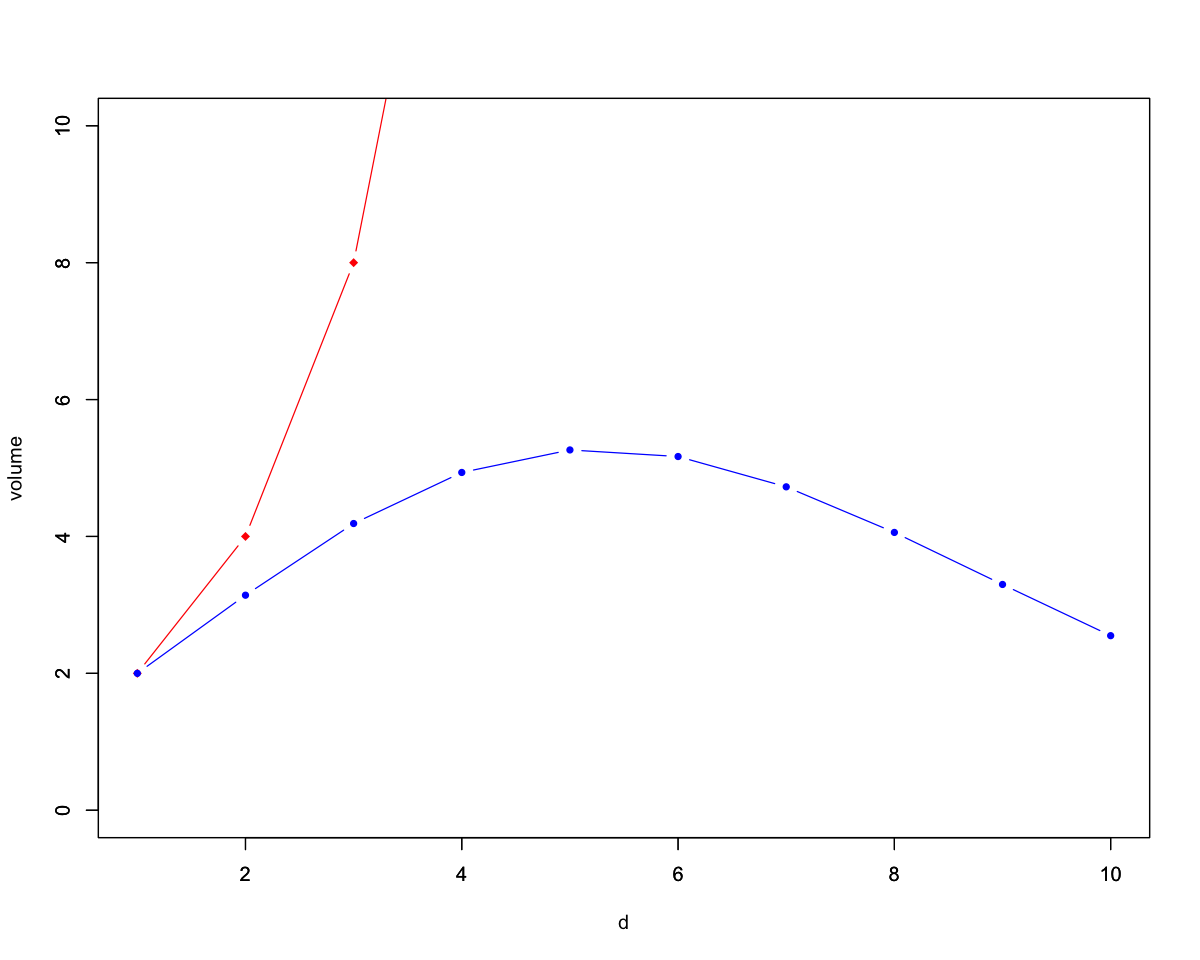

In [244]:
plot((2*R)^x,type='b',pch=18,col='red',ylim=c(0,maxy),xlab='d',ylab='volume')
par(new=T)
plot(v,type='b',pch=20,col='blue',ylim=c(0,maxy),xlab='',ylab='')

The "curse" is mainly caused by irrelevant attributes.

Data lie "on the corner" of the description space and we quickly loose contrast in the pairwise distance matrix, which **misleads** usual machine learning algorithms.

Hopefully, using appropriate preprocessing (feature selection) and distance/similarity often solves the problem.

Be **extremely careful** on which metrics you use (in general, but with text in particular).


## Dot product and cosine

$\vec{x}$ and $\vec{y}$ are both vectors in the VSM.

Cosine is a **similarity** calculated on the angle between the two vectors:

$$cos(\vec{x},\vec{y}) = \frac{\vec{x}.\vec{y}}{||\vec{x}||_2 \times ||\vec{y}||_2}$$

It ranges from 0 (no commonality) to 1 (same vector times a constant factor).

In [246]:
v1
v2
v3
message("v1 vs. v2")
sprintf("cos(v1,v2) = %f", cosine(v1,v2))
sprintf("d(v1,v2) = %f", sqrt(sum((v1-v2)^2)))
message("v1 vs. v3")
sprintf("cos(v1,v3) = %f", cosine(v1,v3))
sprintf("d(v1,v3) = %f",sqrt(sum((v1-v3)^2)))
message("v2 vs. v3")
sprintf("cos(v2,v3) = %f", cosine(v2,v3))
sprintf("d(v2,v3) = %f", sqrt(sum((v2-v3)^2)))

[1] 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0

[1] 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0

[1] 1 0 2 0 1 0 1 0 0 0 0 1 0 1 0 0 2 2 0 1 1 3 0 0 1

v1 vs. v2


[1] "cos(v1,v2) = 0.117851"

[1] "d(v1,v2) = 3.872983"

v1 vs. v3


[1] "cos(v1,v3) = 0.371391"

[1] "d(v1,v3) = 5.099020"

v2 vs. v3


[1] "cos(v2,v3) = 0.000000"

[1] "d(v2,v3) = 6.082763"

### Geometrical interpretation of cosine

<img src="img/cosine.png" style='height: 300px'/>

Note that other metrics can be used (e.g., Jaccard for the presence/absence weighting scheme).

## Basic search engine

- comparing two texts
- **term weighting**
- text ranking
- evaluation

## Term weighting

Up to now, we have used the term frequency (TF) for associating a term to a text.

But here is what we can observe on the famous Reuters corpus:

word|cf|df
-|-|-
try|10,422|8760
insurance|10,440|3997

**cf** = collection frequency<br/>
**df** = document frequency



## Weighting schemes

- presence/absence (1/0)
- term frequency (TF)
- TFxIDF
- OKAPI

## Presence / absence

A text is described by a **binary vector**.

It reduces the impact of document length.

Therefore it seems to be more fitted to **small texts** (e.g., tweets).

## TFxIDF weighting scheme

$$ tf_{t,d} \times idf_{t} $$

with $tf_{t,d}$ as the usual frequency of $t$ in $d$

and $idf_{t} = \log \frac{N}{df_t}$ ($N$ is the total number of documents)

term | $df_t$ | $idf_t$
-|-|-
car|18,165|1.65
auto|6723|2.08
insurance|19,241|1.62
best|25,235|1.5


In [247]:
options(digits=4)
term <- "harry"
sprintf("Total frequency of %s: %i", term, sum(m[term,]))
df <- length(which(m[term,]>0))
N <- dim(m)[2]
sprintf("IDF of %s: %f", term, log2(N/df))

[1] "Total frequency of harry: 1182"

[1] "IDF of harry: 1.696747"

Building the TFxIDF-based terms x documents matrix on our corpus is done with one instruction:

In [248]:
hp.dtm.tfidf <- TermDocumentMatrix(hp.corpus.sw, control = list(weighting = weightTfIdf))
m.tfidf <- as.matrix(hp.dtm.tfidf)

In [249]:
num_doc <- 30
hp[30]
t(m.sw[which(m.sw[,num_doc]>0),num_doc])
t(m.tfidf[which(m.tfidf[,num_doc]>0),num_doc])

[1] "Mr. Dursley sat frozen in his armchair. Shooting stars all over Britain? Owls flying by daylight? Mysterious people in cloaks all over the place? And a whisper, a whisper about the Potters...."

armchair,britain,cloaks,daylight,dursley,flying,frozen,mysterious,owls,people,place,potters,sat,shooting,stars,whisper
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2


armchair,britain,cloaks,daylight,dursley,flying,frozen,mysterious,owls,people,place,potters,sat,shooting,stars,whisper
0.5922,0.6266,0.5489,0.5489,0.3813,0.4819,0.6266,0.5334,0.4556,0.3136,0.4026,0.4556,0.3662,0.5678,0.5203,1.0406


Other weighting schemes can be used, in particular when classes are provided:

- Residual IDF (Rennie and Jaakkola, 2005)
- Odds Ratio (Mladenic and M. Grobelnik, 2009)
- Information Gain (Yang and Pedersen, 1997)
- Chi-squared (Yang and Pedersen, 1997)
- OKAPI BM25 (Robertson et al., 1994)

## OKAPI BM25

$$w_{BM25}(t,d) = tf_{BM25}(t,d) \times idf_{BM25}(t)$$

with:

$tf_{BM25}(t,d) = \frac{tf(t,d) \times (k_1 + 1)}{tf(t,d) + k_1 \times (1 - b + b \times dl(d) / dl_{avg})}$

$idf_{BM25}(t) = \log \frac{N - df(t) + 0.5}{df(t) + 0.5}$

where $dl(d)$ = length of d, $dl_{avg}$ = average length<br/>
$k_1$ and $b$ are given constants (usually $k_1=2$ and $b=0.75$)

## Basic search engine

- comparing two texts
- term weighting
- **text ranking**
- evaluation

Given a simple **query** composed of keywords, rank the documents by decreasing relevance.

First, **embed** the given query into our vocabulary:

In [314]:
vocab.corpus <- rownames(m.tfidf)
query <- c("aunt", "petunia", "nail")
query.vec <- rep(0,length(vocab.corpus))
for (w in match(query, vocab.corpus))
    query.vec[w] <- query.vec[w] + 1

Second, **compute the cosine** between this vector and each document:

In [316]:
rank <- apply(m.tfidf, 2, function(x) cosine(x,query.vec))
top.docs <- sort(rank, decreasing=TRUE)[1:8]
top.docs

314    433    148    162    160    852    126    165 
0.4947 0.3958 0.3654 0.3601 0.3540 0.3318 0.3089 0.2931

Look at the **first top documents** returned:

In [317]:
for (i in  1:4)
{
    numdoc <- as.integer(names(top.docs[i]))
    print(hp[numdoc])
}

[1] "\"Oh, these people's minds work in strange ways, Petunia, they're not like you and me,<U+201D> said Uncle Vernon, trying to knock in a nail with the piece of fruitcake Aunt Petunia had just brought him."
[1] "Aunt Petunia gave a gasp of horror."
[1] "\"Thirty-nine, sweetums,<U+201D> said Aunt Petunia."
[1] "Aunt Petunia looked as though she'd just swallowed a lemon."


## Basic search engine

- comparing two texts
- term weighting
- text ranking
- **evaluation**

## Evaluation

The objective is to compare the "perfect" sorted list with the output of search engines.

If $E$ = *expected* list of relevant documents, and $O$ = *output* of the search algorithm:
<img src="img/evaluation.png" style='height: 200px'/>
precision P = $| E \cap O | / |O|$<br/>
recall R = $| E \cap O | / |E|$<br/>
f-measure = $2 (P\times R) / (P + R)$<br/>

## Beyond words

- **n-grams**
- collocations

Instead of having just single words we can deal with **phrases**.

Different types of phrases:
- Phrases as frequent contiguous word sequences
- Phrases as frequent non-contiguous word sequences

Both types could be identified by simple dynamic programming algorithms.

The main effect of using phrases is to more precisely identify the **sense** of what is written.

## Bi-grams

A bigram is a sequence of two words:

>"american president"<br/>
>"world war"<br/>
>"health care"<br/>
>"bird is"<br/>
>"the sleepy"

It is similar to stick a **2-word window** over the text.

## Words or phrases?

Lewis (SIGIR, 1992) supports that words provide better statistical quality:

- the words may appear multiple times in a document
- a phrase may be present only once so the frequencies can be misleading

Phrases provide more semantic information:

- context
- words may have multiple meanings

## Suffix array algorithm
(Manber and Gene Myers, 1991)

- Array of integers = starting position of suffixes
- Leverage lexicographical order
- Basic operations rely on string manipulation (e.g., is X a substring of T?), usually efficiently calculated

In [253]:
library("gdata")

# compute the common prefix of two strings
common.prefix <- function(word1, word2)
{
  s1 <- substring(word1, 1, 1:nchar(word1))
  s2 <- substring(word2, 1, 1:nchar(word2))
  if(length(w <- which(s1 %in% s2))) s2[max(w)] else character(1)
}

# count the frequency of each pattern inside the suffix array
count.common <- function(common)
{
  output <- data.frame(motif=character(), freq=integer())
  i <- 2
  while (i <= nchar(ch))
  {
    current <- trim(common[i])
    k <- -1
    if ((current != "") && (length(output$motif[output$motif == current]) == 0))
    {
      sum <- 1
      j <- i - 1
      # backward
      while ((j>1) && (substring(common[j], 1, nchar(current)) == current))
      {
        sum <- sum + 1
        j <- j - 1
      }
      # forward
      j <- i + 1
      while ((j<=nchar(ch)) && (substring(common[j], 1, nchar(current)) == current))
      {
        if ((common[j] != current) && (k == -1))  k <- j
        sum <- sum + 1
        j <- j + 1
      }
      output <- rbind(output, data.frame(motif = current, freq = sum + 1))
    }
    if (k != -1)
    {
      i <- k
    }    
    else
      i <- i + 1
  }
  return(output[order(as.character(output$motif)),])
}  

# main function that extracts the frequent motifs
build.freq.motifs <- function(ch)
{
  tab <- data.frame(cbind(1:nchar(ch), sapply(1:nchar(ch), function(x) substring(ch, x, nchar(ch)))))
  colnames(tab) <- c("index", "suffix")
  tab <- tab[order(tab$suffix),]
  common.p <- c("", sapply(2:nchar(ch), function(i) common.prefix(as.character(tab$suffix[i]), as.character(tab$suffix[i-1]))))
  tab <- cbind(tab, common.p)
  return (count.common(common.p))
}

# reversing a string
reverse <- function(ch)
{
    return(paste(strsplit(ch, "")[[1]][nchar(ch):1], collapse=""))
}

**Example:** *"to be or not to be"*

18 suffixes ended by a "sentinel"" (e.g., eof)

In [254]:
ch <- c("to be or not to be")
#example with HP:
#ch <- tolower(gsub("[^[:alpha:]]", " ", paste(hp[1:10], collapse="")))
ch <- gsub(" ", "_", ch)
rbind(1:nchar(ch),strsplit(ch, "")[[1]])

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
t,o,_,b,e,_,o,r,_,n,o,t,_,t,o,_,b,e


In [255]:
tab <- data.frame(cbind(1:nchar(ch), sapply(1:nchar(ch), function(x) substring(ch, x, nchar(ch)))))
colnames(tab) <- c("index", "suffix")
tab <- tab[order(tab$suffix),]
common.p <- c("", sapply(2:nchar(ch), function(i) common.prefix(as.character(tab$suffix[i]), as.character(tab$suffix[i-1]))))
print(cbind(tab, common.p, LCP=nchar(common.p), row.names=NULL))

   index             suffix common.p LCP
1     16                _be            0
2      3   _be_or_not_to_be      _be   3
3      9         _not_to_be        _   1
4      6      _or_not_to_be        _   1
5     13             _to_be        _   1
6     17                 be            0
7      4    be_or_not_to_be       be   2
8     18                  e            0
9      5     e_or_not_to_be        e   1
10    10          not_to_be            0
11    15               o_be            0
12     2  o_be_or_not_to_be     o_be   4
13     7       or_not_to_be        o   1
14    11           ot_to_be        o   1
15     8        r_not_to_be            0
16    12            t_to_be            0
17    14              to_be        t   1
18     1 to_be_or_not_to_be    to_be   5


In [256]:
message("Right complete substrings, computed in O(n):")
rightcomplete <- print(build.freq.motifs(ch))

Right complete substrings, computed in O(n):


  motif freq
2     _    5
1   _be    2
3    be    2
4     e    2
6     o    4
5  o_be    2
7     t    3
8 to_be    2


In [257]:
message("Reverse string:")
ch.rev <- print(reverse(ch))

Reverse string:


[1] "eb_ot_ton_ro_eb_ot"


In [258]:
message("Left complete substrings, computed in O(n):")
leftcomplete <- print(build.freq.motifs(ch.rev))
motifs.rev <- sapply(as.character(leftcomplete$motif), reverse)
leftcomplete.rev <- data.frame(motif=motifs.rev, freq= leftcomplete$freq, row.names=NULL)

Left complete substrings, computed in O(n):


  motif freq
1     _    5
2   _ot    2
3  b_ot    2
4 eb_ot    2
5     o    4
6    ot    2
7     t    3


In [259]:
message("Right complete substrings:")
head(rightcomplete)
message("Left complete substrings:")
head(leftcomplete.rev)
message("Intersection (freq in descreasing order):")
motifs.inter <- intersect(rightcomplete$motif, leftcomplete.rev$motif)
freq.inter <- subset(rightcomplete, motif %in% motifs.inter)
freq.inter[order(freq.inter$freq, decreasing = TRUE),]

Right complete substrings:


,motif,freq
2,_,5
1,_be,2
3,be,2
4,e,2
6,o,4
5,o_be,2


Left complete substrings:


,motif,freq
1,_,5
2,to_,2
3,to_b,2
4,to_be,2
5,o,4
6,to,2


Intersection (freq in descreasing order):


,motif,freq
2,_,5
6,o,4
7,t,3
8,to_be,2


To extract "meaningful" phrases, Osinski (2003) rely on **4 additional hypotheses**:

- Frequency > given threshold (not cross sentence boudaries)
- Complete phrase

*"Senator Hillary Rodham Clinton"* better than *"Senator Hillary"* (if equal TF)
- Not begin nor end with a stopword

In [260]:
message("Removing too small strings:")
motifs.inter <- motifs.inter[nchar(motifs.inter)>2]
freq.inter <- subset(rightcomplete, motif %in% motifs.inter)
data.frame(freq.inter[order(freq.inter$freq, decreasing = TRUE),], row.names=NULL)

Removing too small strings:


,motif,freq
1,to_be,2


## Application to topic labeling

<img src="img/labeling.png" style='height: 500px'/>

*Regrouper les données textuelles et nommer les groupes à l'aide de classes recouvrantes (Rizoiu et al., 2010).*

Excerpt of the results:

<img src="img/res_labeling.png" style='height: 500px'/>

An interesting observations:

<img src="img/obs.png" style='height: 400px'/>

## Beyond words

- n-grams
- **collocations**

A **collocation** is a group of words for which usage has established such an affinity that fluent speakers automatically associate them together.

Phrases, such as *"New York City"*, that make sense only if considered as a whole.

Other examples:

>"rig the election"<br/>
>"to cost an awful lot of money”<br/>

The meaning of the whole is greater than the meaning of the sum of its parts.

## C-value

<img src="img/c-value.png" style='height: 400px'/>

## Pointwise Mutual Information

$$PMI(w_1, w_2) = \log\frac{p(w_1w_2)}{p(w_1)p(w_2)}$$

with:

$p(w_1, w_2)$ the **observed evidence** of $w_1$ combined with $w_2$<br/>
$p(w_1)p(w_2)$ the according **expected chance**

Usually, $p(t)$ is simply set to $\frac{\#t}{N}$.

In [261]:
hp.lower <- tolower(hp)

# input: m (matrix term x documents), words w1 and w2
# output: PMI between w1 and w2
PMI <- function(w1, w2)
{
  # nb docs with w1    
  docs.w1 <- which(m[w1,] > 0)
  p1 <- length(docs.w1)
  # nb docs with w2    
  docs.w2 <- which(m[w2,] > 0)
  p2 <- length(docs.w2)
  # nb docs with w2 & w1    
  inter <- grep(paste(w1,w2), hp.lower)
  p1_and_p2 <- length(inter)
  if (p1_and_p2 == 0)
    return(0)
  else
    return (log2((p1_and_p2 * dim(m)[2]) / (p1 * p2)))
}

In [262]:
length(which(m["shooting",]>0))
length(which(m["stars",]>0))
length(intersect(which(m["shooting",]>0), which(m["stars",]>0)))
log2(length(hp)*3/(4*7))
length(hp)
search <- function(w1, w2)
{
   return(hp.lower[grep(paste(w1,w2), hp.lower)])
}


[1] 4

[1] 7

[1] 3

[1] 8.43

[1] 3219

In [263]:
options(digits=4)
message("Seems correct:")
print(PMI("hermione", "granger"))
print(PMI("neville", "longbottom"))
print(PMI("professor", "mcgonagall"))
print(PMI("shooting","stars"))
message("But...")
print(PMI("harry","potter"))
print(PMI("ron","weasley"))

Seems correct:


[1] 3.515
[1] 3.728
[1] 4.447
[1] 8.845


But...


[1] 0.4974
[1] -2.301


### Problem with the PMI

A frequent pattern can be discarded because it is composed of frequent words.

Besides, PMI is highly sensitive to rare patterns.

One solution is to **smooth** the probability distribution (e.g., Laplacian smoothing).

**Thank you!**

Some links to go beyond basic techniques:

- introduction to the tm Package Text Mining in R<br/>
<div style="font-size:80%; margin-top:-16px;">https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf</div>
- mixing text mining and social media analysis<br/>
<div style="font-size:80%; margin-top:-16px;">http://www.rdatamining.com/examples/social-network-analysis</div>
- topic modeling with the mallet package<br/>
<div style="font-size:80%; margin-top:-16px;">https://cran.r-project.org/web/packages/mallet/mallet.pdf</div>
- word embedding with Word2vec<br/>
<div style="font-size:80%; margin-top:-16px;">https://github.com/bmschmidt/wordVectors</div>